In [255]:
# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [256]:
# importing datasets
conf_df = pd.read_csv('C:/Users/User/hwao/time_series_2019-ncov-Confirmed.csv')
deaths_df  = pd.read_csv('C:/Users/User/hwao//time_series_2019-ncov-Deaths.csv')
recv_df = pd.read_csv('C:/Users/User/hwao//time_series_2019-ncov-Recovered.csv')

In [257]:
conf_df.head()
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20
0,Anhui,Mainland China,31.82571,117.2264,0,0,0,0,0,0,...,0,0,1,3,4,4,5,6,6,6
1,Beijing,Mainland China,40.18238,116.4142,0,0,0,0,0,1,...,1,2,2,2,3,3,3,3,4,4
2,Chongqing,Mainland China,30.05718,107.8740,0,0,0,0,0,0,...,2,2,2,2,3,3,4,5,5,5
3,Fujian,Mainland China,26.07783,117.9895,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Gansu,Mainland China,36.06110,103.8343,0,0,0,0,0,0,...,0,1,2,2,2,2,2,2,2,2


In [258]:
dates = list(conf_df.columns[4:])
dates1 = list(recv_df.columns[4:])

conf_df_long = conf_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Confirmed')

deaths_df_long = deaths_df.melt(id_vars=list(deaths_df.columns[:4]),
                          value_vars=dates, var_name='Date', value_name='Deaths')
recv_df_long = recv_df.melt(id_vars=list(deaths_df.columns[:4]),
                          value_vars=dates1, var_name='Date', value_name='Recovered')

#melt( value_vars는 인덱스를 데이터를 전부 세로로 배치 )

In [259]:
recv_df_long.head()
deaths_df_long.head()
conf_df_long.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,Anhui,Mainland China,31.82571,117.2264,1/22/20,1
1,Beijing,Mainland China,40.18238,116.4142,1/22/20,14
2,Chongqing,Mainland China,30.05718,107.8740,1/22/20,6
3,Fujian,Mainland China,26.07783,117.9895,1/22/20,1
4,Gansu,Mainland China,36.06110,103.8343,1/22/20,0


In [280]:
full_table = pd.concat([conf_df_long, deaths_df_long['Deaths'], recv_df_long['Recovered']], axis=1, sort=False)
full_table['Date'] = pd.to_datetime(full_table['Date']) # datetime형식으로 자동 변환

In [281]:
full_table = full_table.replace("Mainland China","China")
full_table.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Anhui,China,31.82571,117.2264,2020-01-22,1,0,0.0
1,Beijing,China,40.18238,116.4142,2020-01-22,14,0,0.0
2,Chongqing,China,30.05718,107.8740,2020-01-22,6,0,0.0
3,Fujian,China,26.07783,117.9895,2020-01-22,1,0,0.0
4,Gansu,China,36.06110,103.8343,2020-01-22,0,0,0.0


In [279]:
full_table = full_table[['Confirmed', 'Deaths', 'Recovered']].fillna(0) 
# Nan값 0으로 대체 

In [276]:
full_table.head()

,Confirmed,Deaths,Recovered
0,1,0,0.0
1,14,0,0.0
2,6,0,0.0
3,1,0,0.0
4,0,0,0.0


In [282]:
full_table['Deaths per Confirmed'] =full_table['Recovered']/full_table['Confirmed']
full_table['Recovered per Confirmed'] = full_table['Recovered']/full_table['Confirmed']
china = full_table[full_table['Country/Region'] == 'China']
row =  full_table[full_table['Country/Region'] != 'China']

In [283]:
full_table.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Deaths per Confirmed,Recovered per Confirmed
0,Anhui,China,31.82571,117.2264,2020-01-22,1,0,0.0,0.0,0.0
1,Beijing,China,40.18238,116.4142,2020-01-22,14,0,0.0,0.0,0.0
2,Chongqing,China,30.05718,107.8740,2020-01-22,6,0,0.0,0.0,0.0
3,Fujian,China,26.07783,117.9895,2020-01-22,1,0,0.0,0.0,0.0
4,Gansu,China,36.06110,103.8343,2020-01-22,0,0,0.0,NaN,NaN


In [284]:
full_latest = full_table[full_table['Date'] == max(full_table['Date'])].reset_index()
china_latest = full_table[full_table['Country/Region'] == 'China']
row_latest = full_table[full_table['Country/Region'] != 'China']

In [285]:
row_latest.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Deaths per Confirmed,Recovered per Confirmed
31,NaN,Thailand,13.7563,100.5018,2020-01-22,2,0,0.0,0.0,0.0
32,NaN,Japan,35.6762,139.6503,2020-01-22,2,0,0.0,0.0,0.0
33,NaN,South Korea,37.5665,126.9780,2020-01-22,1,0,0.0,0.0,0.0
34,Taiwan,Taiwan,23.6978,120.9605,2020-01-22,1,0,0.0,0.0,0.0
35,"Seattle, WA",US,47.7511,-120.7400,2020-01-22,1,0,0.0,0.0,0.0


In [286]:
full_latest_grouped = full_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
china_latest_grouped = china_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
row_latest_grouped = row_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()

In [287]:
row_latest_grouped.head()
full_latest_grouped.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered'], dtype='object')

In [288]:
# https://www.kaggle.com/imdevskp/corona-virus-covid-19-ncov-19-outbreak-analysis

In [289]:
# Countries reported
Countries_reported = full_latest.groupby(full_latest["Country/Region"]).sum()
Countries_reported.head()


Countries_reported2 = Countries_reported.reset_index().rename(columns={"id":"Country/Region"}) 
#reset_index 사용시, 컬럼 이름 삭제 되기 때문에, 다시 이름 지어줄 필요 있음
print(Countries_reported2.columns)

Index(['Country/Region', 'index', 'Lat', 'Long', 'Confirmed', 'Deaths',
       'Recovered', 'Deaths per Confirmed', 'Recovered per Confirmed'],
      dtype='object')


In [290]:
full_latest.head()
#print(full_latest.iloc[0])

,index,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Deaths per Confirmed,Recovered per Confirmed
0,1875,Anhui,China,31.82571,117.2264,2020-02-16,962,6,255.0,0.265073,0.265073
1,1876,Beijing,China,40.18238,116.4142,2020-02-16,380,4,108.0,0.284211,0.284211
2,1877,Chongqing,China,30.05718,107.8740,2020-02-16,551,5,207.0,0.375681,0.375681
3,1878,Fujian,China,26.07783,117.9895,2020-02-16,287,0,82.0,0.285714,0.285714
4,1879,Gansu,China,36.06110,103.8343,2020-02-16,90,2,54.0,0.600000,0.600000


In [291]:
# World wide Map Plotting

m = folium.Map(location=[0, 0], tiles='cartodbpositron',
               min_zoom=2, max_zoom=4, zoom_start=2) # 줌인아웃 크기 조절 가능 

for i in range(0, len(full_latest)):
    folium.Circle(
        location=[full_latest.iloc[i]['Lat'], full_latest.iloc[i]['Long']] # latitude 위도,경도 
        ,color='crimson', 
        tooltip =   '<li><bold>Country : '+str(full_latest.iloc[i]['Country/Region'])+
                    '<li><bold>Province : '+str(full_latest.iloc[i]['Province/State'])+
                    '<li><bold>Confirmed : '+str(full_latest.iloc[i]['Confirmed'])+
                    '<li><bold>Deaths : '+str(full_latest.iloc[i]['Deaths'])+
                    '<li><bold>Recovered : '+str(full_latest.iloc[i]['Recovered']),
        radius=int(full_latest.iloc[i]['Confirmed'])).add_to(m) # radius 지도에 그리는 원형의 크기를 지정(Cinfirmed 확진자 체크)

In [295]:
m.save("C:/Users/User/hwao/map.html")

In [317]:
r1 = row_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index().sort_values(by='Confirmed', ascending=False).reset_index(drop=True)
# reset_index(drop=True) index 초기화: groupby진행하면, 인덱스가 섞이게 되는데, 해당 변수를 작성하면, 초기화 가능
rl.head().style.background_gradient(cmap='rainbow') # dataframe에서 cell별로 색깔 넣어줌 

,Country/Region,Confirmed,Deaths,Recovered
0,Others,1664,0,0
1,Singapore,702,0,98
2,Hong Kong,609,13,6
3,Thailand,546,0,159
4,Japan,519,4,79


In [322]:
correlation = r1.corr()

print("\n Correlation Table")
correlation.style.background_gradient(cmap='rainbow')


 Correlation Table


,Confirmed,Deaths,Recovered
Confirmed,1,0.0838449,0.329899
Deaths,0.0838449,1,-0.0848021
Recovered,0.329899,-0.0848021,1


In [348]:
c_spread = pd.DataFrame(china[china['Confirmed'] != 0])
#!=0].groupby('Date')['Province/State'].unique

,Confirmed,Deaths,Recovered,Deaths per Confirmed,Recovered per Confirmed
0,12047,35,1434.0,1.741584,1.741584
1,5504,38,739.0,2.459867,2.459867
2,7998,44,1109.0,2.201718,2.201718
3,4254,0,518.0,1.945684,1.945684
4,1299,17,312.0,3.707413,3.707413


In [364]:
Probince_State = c_spread.groupby('Province/State').sum()
# iloc은 index로/ loc은 name으로
# iloc, loc에서 쉼표 전 까지가 행/ 다음이 열 
Probince_State.head()

,Lat,Long,Confirmed,Deaths,Recovered,Deaths per Confirmed,Recovered per Confirmed
Province/State,,,,,,,
Anhui,827.46846,3047.8864,12047,35,1434.0,1.741584,1.741584
Beijing,1044.74188,3026.7692,5504,38,739.0,2.459867,2.459867
Chongqing,781.48668,2804.7240,7998,44,1109.0,2.201718,2.201718
Fujian,678.02358,3067.7270,4254,0,518.0,1.945684,1.945684
Gansu,901.52750,2595.8575,1299,17,312.0,3.707413,3.707413


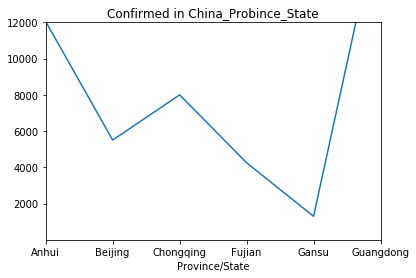

509990

In [402]:
plt.title("Confirmed in China_Probince_State")
plt.xlabel('Province/State')
plt.xlim(0,5) # 1~5 번 까지 그리기 
plt.ylim(1,12000)
#plt.yscale('log')
#plt.axis('off')
plt.plot(Probince_State.index,Probince_State['Confirmed'])
plt.show()
Probince_State['Confirmed'].max()